# Car Price Prediction

### Description of dataset
1. Name : Company name
2. Location : Location where the car has been purchased
3. Year : Manufacturing year
4. Kilometers_driven : Total distance the car has been driven
5. Fuel Type  ; Diesel, Petrol, CNG, Electric, LPG   (Type of Fuel used)
6. Transmission : Type of gearing system used
7. Owner type : First/Second/Third etc 
8. Mileage : a number of miles travelled or covered in a litre or kg of fuel in kmpl or km/kg
9. Engine : A component that drives the system in CC
10. Power : Power of Engine
11. Seats : Seats provided
12. Price : Price of vehichle (In Lakhs) #### Target

In [1]:
#Importing neccassary libraries
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import sweetviz as sv

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('train-data.csv')

In [ ]:
my_report = sv.analyze(train)
my_report.show_html()

In [4]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
train.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [6]:
train.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [7]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

# 1. Data Preprocessing

In [8]:
#unique values in categorical columns
train[['Name','Location','Fuel_Type','Transmission','Owner_Type']].nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

In [9]:
train['Year'] = train['Year'].astype(int)

#### a. Null value treatment

In [10]:
train.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Looks like we have some null values in our dataset, but first we have to deal with categorical data

#### Removing the unnecassary strings in our columns

In [11]:
train['Power'] = train['Power'].str.replace('bhp', '')


In [12]:
train['Engine'] = train['Engine'].str.replace('CC','')


In [13]:
train['Mileage'] = train['Mileage'].str.replace('kmpl', '')
train['Mileage'] = train['Mileage'].str.replace('km/kg', '')

train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [14]:
#Converting to numerical type
train['Mileage'] = pd.to_numeric(train['Mileage'].astype(str).str[:-1], errors='coerce')
train['Engine'] = pd.to_numeric(train['Engine'].astype(str).str[:-1], errors='coerce')
train['Power'] = pd.to_numeric(train['Power'].astype(str).str[:-1], errors='coerce')

Am replacing the null values with Median, because it is robust to outliers

In [15]:
#Treating null values
train['Mileage'].fillna((train['Mileage'].median()), inplace=True)
train['Engine'].fillna((train['Engine'].median()), inplace=True)
train['Power'].fillna((train['Power'].median()), inplace=True)
train['Seats'].fillna((train['Seats'].median()), inplace=True)


In [16]:
train.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int32  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(5)
memory usage: 587.9+ KB


#### b. Outlier treatment

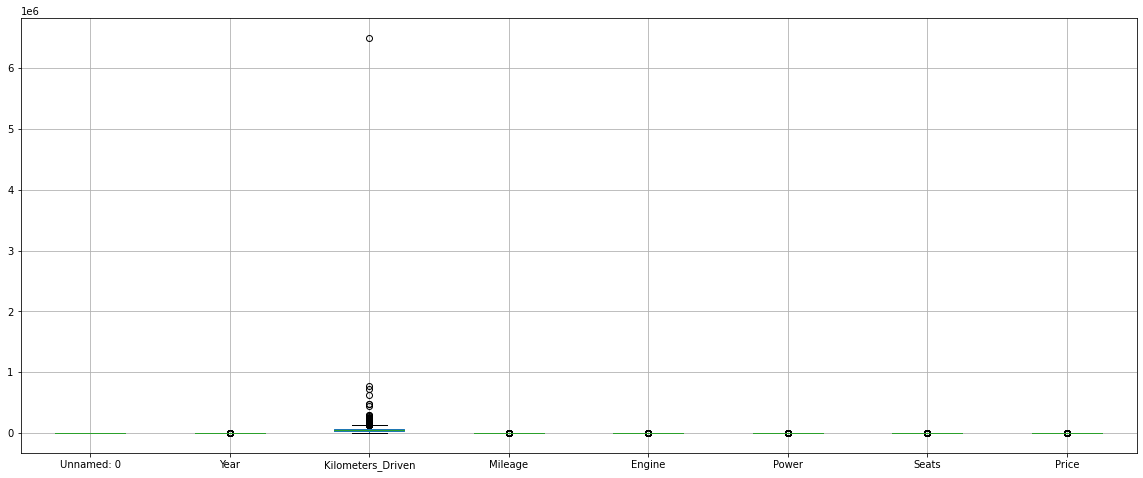

In [18]:
train.boxplot(figsize=(20,8))

In [19]:
#Using Log transform for Outlier treatment
train["Kilometers_Driven"] = train["Kilometers_Driven"].map(lambda i: np.log(i) if i > 0 else 0) 
#print(train['Kilometers_Driven'].skew())
print(train['Kilometers_Driven'].skew())

-1.29076524053299


In [20]:
train['Year']

0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
6014    2014
6015    2015
6016    2012
6017    2013
6018    2011
Name: Year, Length: 6019, dtype: int32

In [21]:
#Using Median value for outlier treatment
print(train['Year'].quantile(0.50)) 
print(train['Year'].quantile(0.95))

2014.0
2018.0


In [23]:
train['Year'] = np.where(train['Year'] > 2018.0, 2014.0, train['Year'])

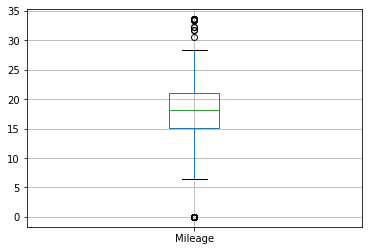

In [24]:
train.boxplot(column=['Mileage'])

In [25]:
#Using Quantile for outlier treatment
print(train['Mileage'].quantile(0.10))
print(train['Mileage'].quantile(0.90))


12.8
24.0


In [26]:
train["Mileage"] = np.where(train["Mileage"] <train['Mileage'].quantile(0.10), train['Mileage'].quantile(0.10),train['Mileage'])
train["Mileage"] = np.where(train["Mileage"] >train['Mileage'].quantile(0.90), train['Mileage'].quantile(0.90),train['Mileage'])

#### I will use the same method for remaining features aswell

In [27]:
print(train['Engine'].quantile(0.10))
print(train['Engine'].quantile(0.90))

1061.0
2494.0


In [28]:
train["Engine"] = np.where(train["Engine"] <1061.0, 1061.0,train['Engine'])
train["Engine"] = np.where(train["Engine"] >2494.0, 2494.0,train['Engine'])

In [29]:
print(train['Power'].quantile(0.10))
print(train['Power'].quantile(0.90))

67.04
184.0


In [30]:
train["Power"] = np.where(train["Power"] <67.04, 67.04,train['Power'])
train["Power"] = np.where(train["Power"] >184.0, 184.0,train['Power'])

In [31]:
train["Seats"] = np.where(train["Seats"] <train['Seats'].quantile(0.10), train['Seats'].quantile(0.10),train['Seats'])
train["Seats"] = np.where(train["Seats"] >train['Seats'].quantile(0.90), train['Seats'].quantile(0.90),train['Seats'])

In [32]:
train["Price"] = np.where(train["Price"] <train['Price'].quantile(0.10), train['Price'].quantile(0.10),train['Price'])
train["Price"] = np.where(train["Price"] >train['Price'].quantile(0.90), train['Price'].quantile(0.90),train['Price'])

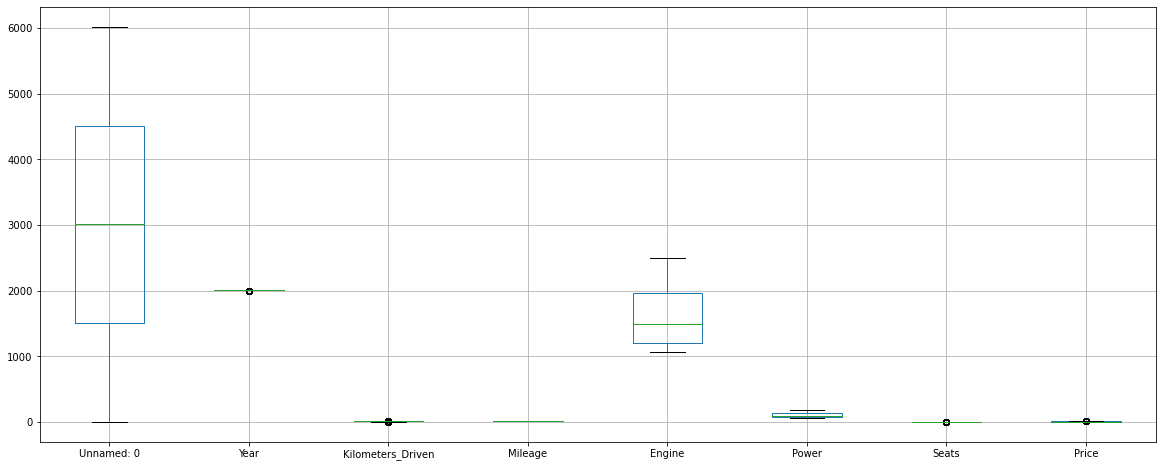

In [33]:
train.boxplot(figsize=(20,8))

#### So Now most of the outliers have been treated, but still there are some outlier so we have to use the alogrithms which are leasr affected by the ouliers.

# 2. Data Visualization

#### 1. Does year affect the price?

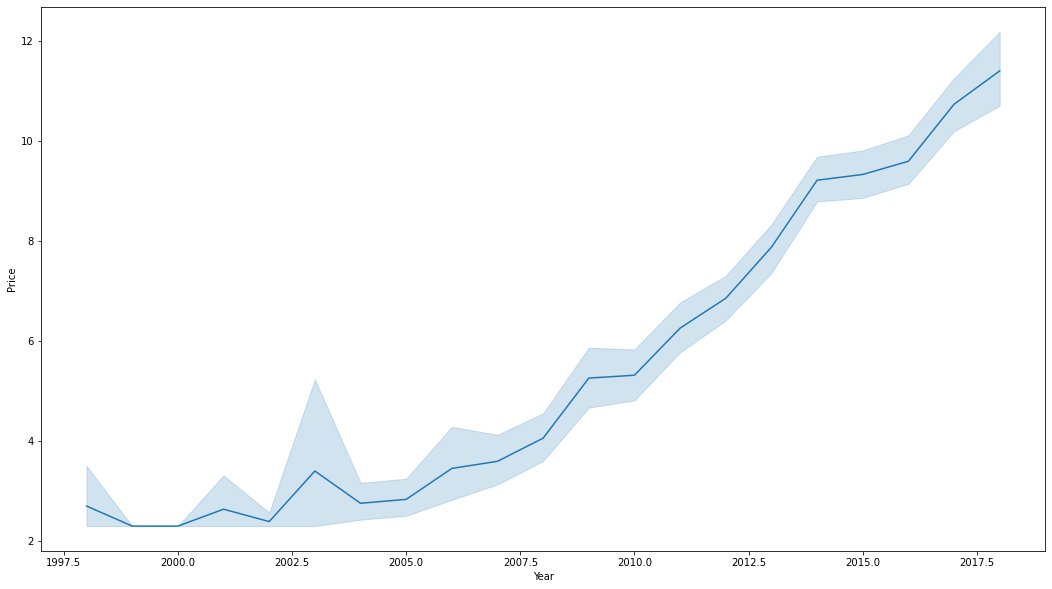

In [34]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Year", y="Price", data=train)
plt.show()

* Price and Year are directly proportional to each other, i.e.. price depends on the year in whicah car as been purchased. Old cars have less price compare to new ones.
* This may be due to the features provided in new cars.

#### 2. Does transmission type affect the price?

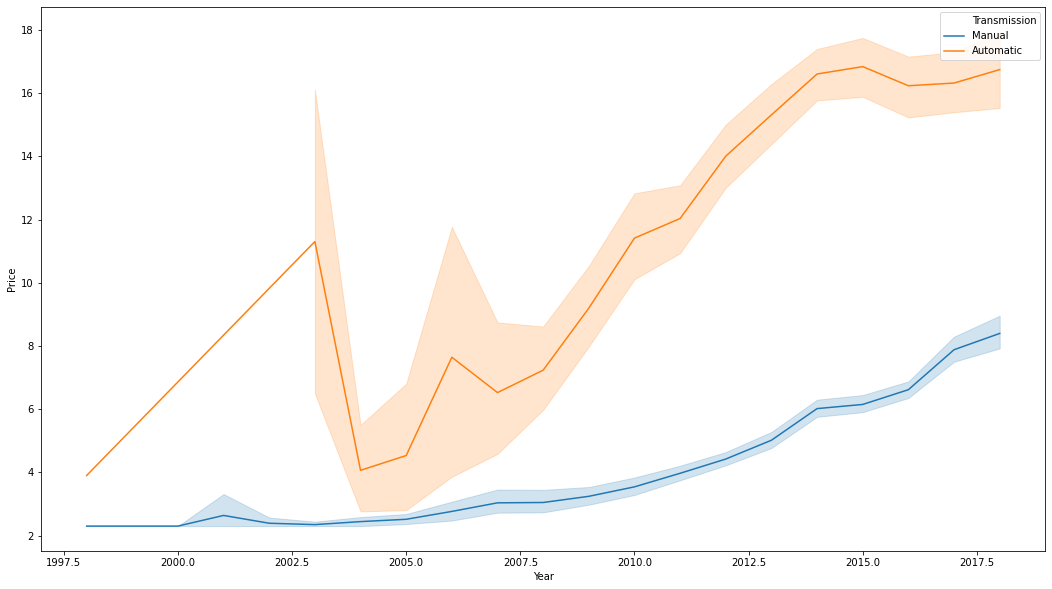

In [35]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Year", y="Price", hue='Transmission', data=train)
plt.show()

* So as per the above plot, the cars with Aanual transmission are having less cost compare to Automatic transmission.
* It is because Automatic transmission requires less effort to drive in traffic.(I have studied about this from external source)

#### Let us see the features why automatic transmission costs more than manual one

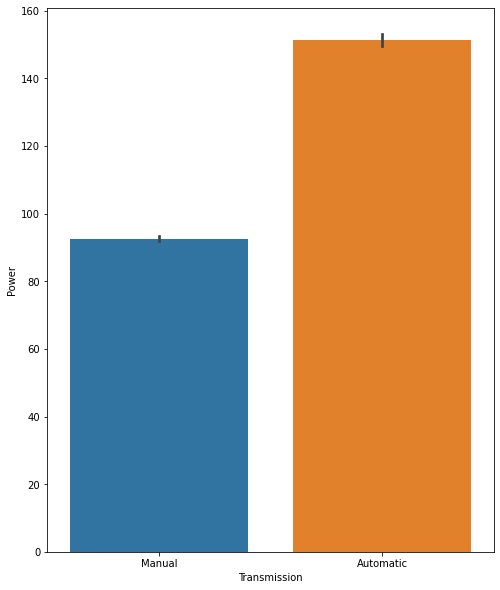

In [36]:
plt.figure(figsize=(8,10))
sns.barplot(x="Transmission", y="Power", data=train)
plt.show()

Automatic transmission offers more power compared to Manual transmission

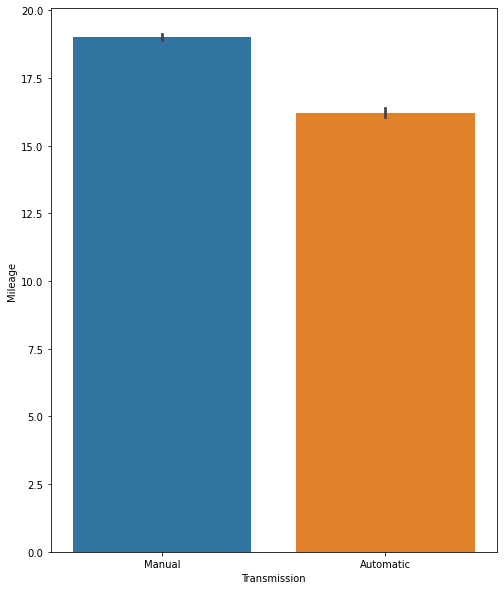

In [37]:
plt.figure(figsize=(8,10))
sns.barplot(x="Transmission", y="Mileage", data=train)
plt.show()

* As per our data, mileage in manual transmission is more compared to automatic transmission.

In [38]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

#### Which city has highest number of sales

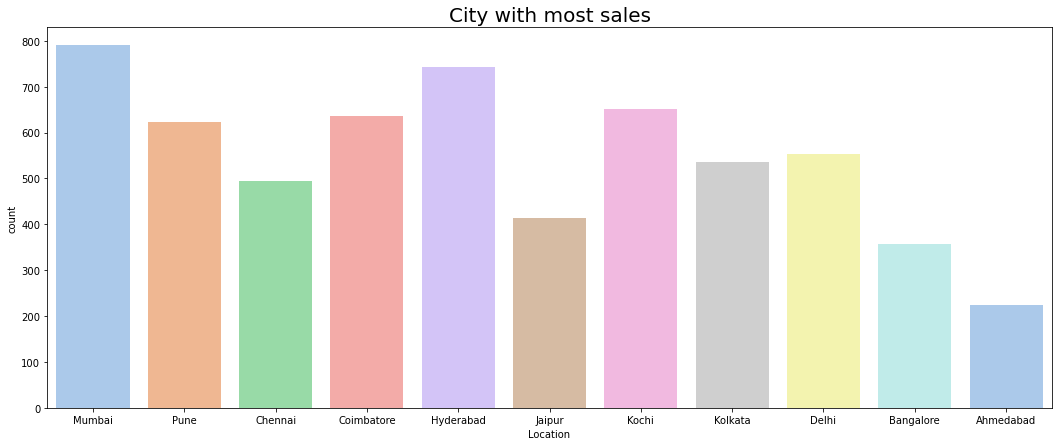

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(train['Location'], palette = 'pastel')
plt.title('City with most sales', fontsize = 20)
plt.show()

* Mumbai has highest sales, ahmedabad is least

#### Which is the preffered transmission type

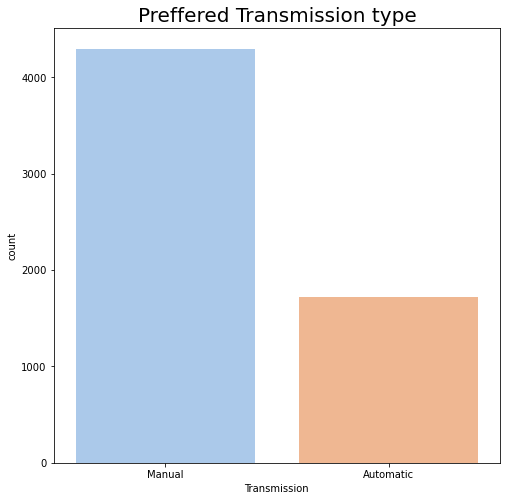

In [40]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(train['Transmission'], palette = 'pastel')
plt.title('Preffered Transmission type', fontsize = 20)
plt.show()

#### Preffered Fuel Type

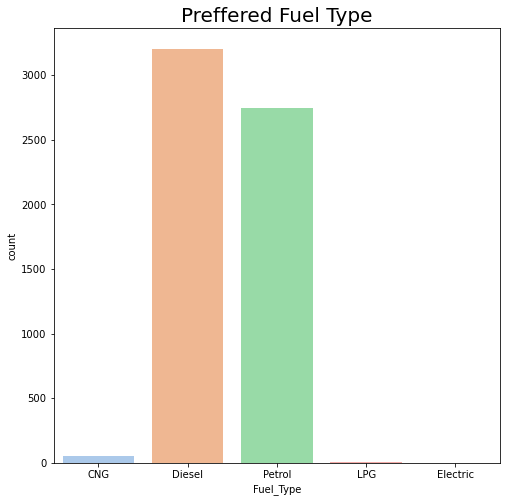

In [41]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(train['Fuel_Type'], palette = 'pastel')
plt.title('Preffered Fuel Type', fontsize = 20)
plt.show()

#### Which year has maximum sales

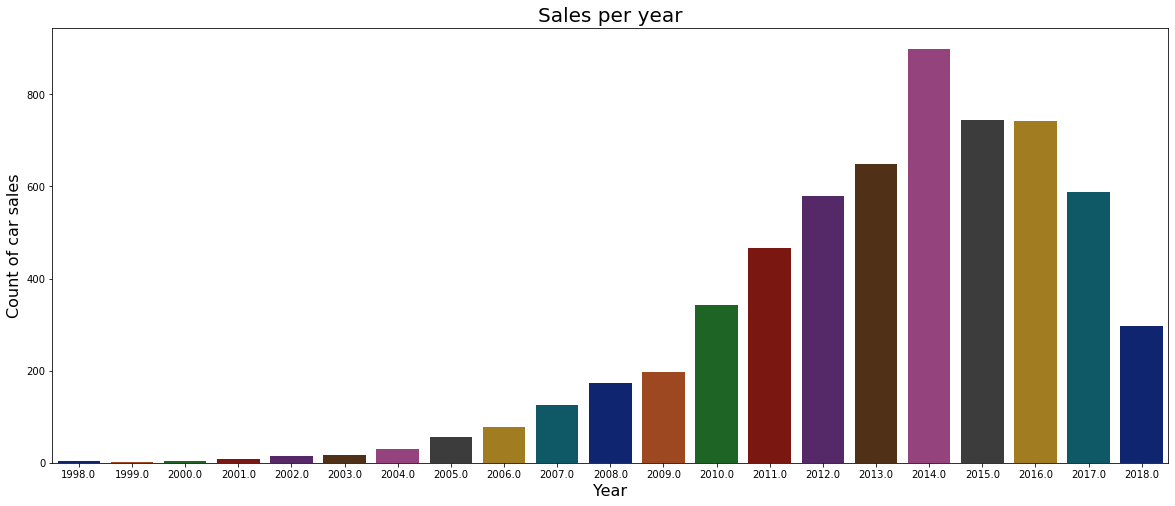

In [42]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = 'Year', data = train, palette = 'dark')
ax.set_title(label = 'Sales per year', fontsize = 20)
ax.set_xlabel(xlabel = 'Year', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of car sales', fontsize = 16)
plt.show()

2014 has maximum sales

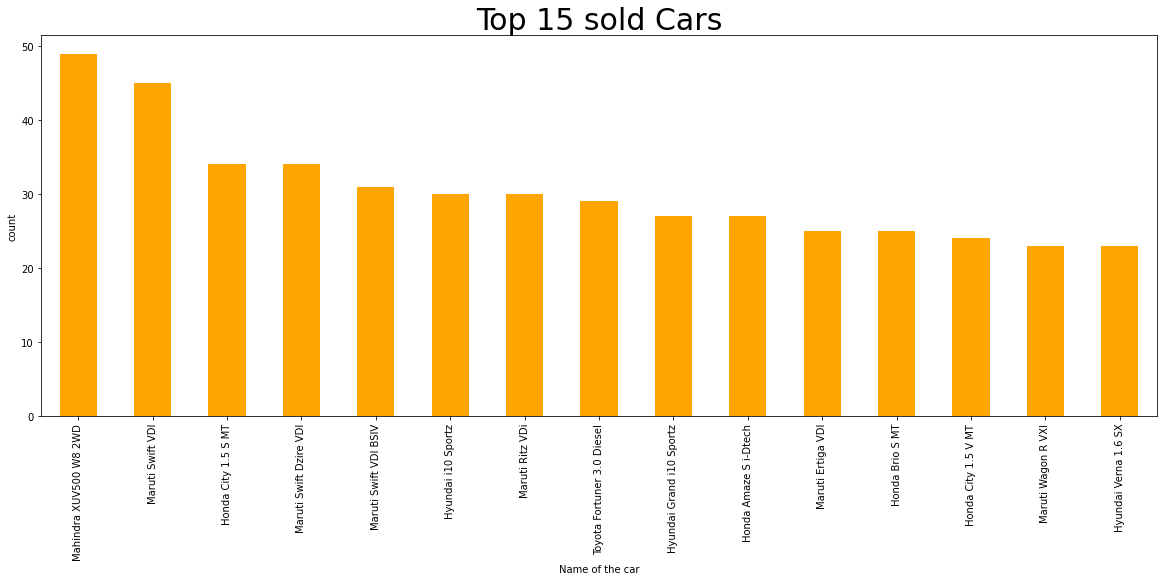

In [43]:
# To show top 15 cars

train['Name'].value_counts().head(15).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Top 15 sold Cars', fontsize = 30, fontweight = 20)
plt.xlabel('Name of the car')
plt.ylabel('count')
plt.show()

Maruthi XUV has highest sales

# 3. Treating Categorical columns

In [44]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010.0,11.184421,CNG,Manual,First,24.00,1061.0,67.04,5.0,2.30
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011.0,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012.0,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [46]:
#Columns with string values
categorical_column = ['Location', 'Fuel_Type',
                      'Transmission', 'Owner_Type']

In [47]:
#Deep copy the original data
train = train.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        train[col] = lab_enc.fit_transform(train[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Location
mapping {'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Coimbatore': 3, 'Delhi': 4, 'Hyderabad': 5, 'Jaipur': 6, 'Kochi': 7, 'Kolkata': 8, 'Mumbai': 9, 'Pune': 10}
Feature Fuel_Type
mapping {'CNG': 0, 'Diesel': 1, 'Electric': 2, 'LPG': 3, 'Petrol': 4}
Feature Transmission
mapping {'Automatic': 0, 'Manual': 1}
Feature Owner_Type
mapping {'First': 0, 'Fourth & Above': 1, 'Second': 2, 'Third': 3}


In [48]:
#Using pandas get dummies function, for names column
df_dummies = pd.get_dummies(train.Name,drop_first=True)

In [49]:
#Concatinating dummies to original dataframe
train = pd.concat([train,df_dummies], axis = 'columns')

In [50]:
#Dropping unnecassary features
train = train.drop(['Unnamed: 0', 'Name'], axis = 1)

In [51]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Volvo S80 D5,Volvo V40 Cross Country D3,Volvo V40 D3,Volvo V40 D3 R Design,Volvo XC60 D4 SUMMUM,Volvo XC60 D4 Summum,Volvo XC60 D5,Volvo XC60 D5 Inscription,Volvo XC90 2007-2015 D5 AT AWD,Volvo XC90 2007-2015 D5 AWD
0,9,2010.0,11.184421,0,1,0,24.00,1061.0,67.04,5.0,...,0,0,0,0,0,0,0,0,0,0
1,10,2015.0,10.621327,1,1,0,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011.0,10.736397,4,1,0,18.20,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,0,0
3,2,2012.0,11.373663,1,1,0,20.77,1248.0,88.76,7.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2013.0,10.613246,1,0,2,15.20,1968.0,140.80,5.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X= train.drop("Price", axis = 1) #independent variables
y = train["Price"] #target feature

In [54]:
#train test split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Am not using linear regression because our data has some outlier

### 1.Gradient Boost

In [56]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [57]:
y_pred = model.predict(X_test)

In [58]:
model.score(X_train, y_train)

0.9266940284361527

In [59]:
model.score(X_test, y_test)

0.90488098576042

In [60]:
#Metrics for evaluating parameters
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2623953336274423
MSE: 3.7951186980144302
RMSE: 1.9481064390875644


### 2.Random Forest regressor

In [62]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_Rf = model1.predict(X_test)

In [64]:
#Performance of model on train data
model1.score(X_train, y_train)

0.9896273493188181

In [65]:
model1.score(X_test, y_test)

0.9224630864652906

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_Rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_Rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Rf)))

MAE: 0.9573422427885886
MSE: 3.093616903984465
RMSE: 1.7588680746390462


### 3.XG Boost

In [67]:
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

[20:06:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [68]:
y_pred_xgr = xgr.predict(X_test)

In [69]:
xgr.score(X_train,y_train)

0.9229148420552553

In [70]:
xgr.score(X_test,y_test)

0.9031317667249047

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgr)))

MAE: 1.253781954075147
MSE: 3.8649101474073584
RMSE: 1.965937472913968


### 4.Extra Trees Regressor

In [73]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [74]:
reg.score(X_train, y_train)

0.9999919750266936

In [75]:
reg.score(X_test, y_test)

0.9216306667511523

In [76]:
r_pred = reg.predict(X_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, r_pred))
print('MSE:', metrics.mean_squared_error(y_test, r_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, r_pred)))

MAE: 0.9527741971207091
MSE: 3.1268293131644516
RMSE: 1.768284285165836


### Conclusion:
####    --> After training the above models, Extra trees regressor is having a leasr RMSE, MSE, MAE score with a good accuracy of 92% on our test data.